## Copyright MaximFLUNN 2022

Elapsed time: ~30 seconds with Jupyter online (Jupyter lite) - array numbers (50, 1000, 50) (20 точек)                                                                                                      
Elapsed time: ~190 seconds with Jupyter online (Jupyter lite) - array numbers (5, 1000, 5) (200 точек)                                                                                                      
Elapsed time: ~785 seconds with Jupyter online (Jupyter lite) - array numbers (1, 1000, 1) (1000 точек)

# Зачетная работа по предмету “Системы компьютерной математики”.
#### Тема:  8. Плохо обусловленные матрицы

#### Выполнил: Филатов Максим Сергеевич

#### Преподаватель: Золотых Николай Юрьевич

Провести серию экспериментов, тестирующую команды scipy.linalg.solve, numpy.linalg.cond на плохо обусловленных матрицах вида A = LU, где L, U – случайные нижняя треугольная и верхняя треугольная матрицы соответственно с малыми диагональными элементами.

Экспериментальным путем для каждого из перечисленных классов установить диапазон изменения порядка 10^16 матрицы, при котором число обусловленности не превосходит ведичины порядка . Построить графики значений, выдаваемых функцией scipy.linalg.cond. Построить графики используемого этими функциями времени. Для каждой матрицы задать случайно решение x. По матрице A и решению x сгенерировать правую часть системы линейных уравнений b. Решить систему Ax = b, используя scipy.linalg.solve. Построить графики относительной ошибки решения и невязки. Объяснить результаты.

##### Импорт нужных библиотек

In [1]:
from numpy import random 
from matplotlib import pyplot
import numpy
import time

##### Вывод графиков как картинки в оболочке jupyter
Нужен для показа графиков

In [2]:
%matplotlib inline

##### Создаём нужные нам массивы

In [3]:
CONDs = []                                                                                    # Массив с числами обусловленности
timeCond = []                                                                                 # Массив со временем нахождения чисел обусловленности
timeSolve = []                                                                                # Массив со временем решения 
Error = []                                                                                    # Массив с относительными ошибками
Discrepancy = []                                                                              # Массив с невязкой

##### Создаём и заполняем массив чисел

In [4]:
numbers = numpy.arange(1, 1000, 1)                                                            # Генерпация равномерно распределенных значений в пределах заданного интервала

##### Функция поиска относительной ошибки

In [5]:
def ErrorFind():                                                                              # Название функции 'StartFErrorFinduncTime'
    return numpy.linalg.norm(x_ss-x_r) / numpy.linalg.norm(x_r)                               # Рассчитывает и возвращает относительную ошибку

##### Функция поиска невязки

In [6]:
def DiscrepancyFind():                                                                        # Название функции 'DiscrepancyFind'
    return numpy.linalg.norm(LU.dot(x_ss) - b) / numpy.linalg.norm(b)                         # Рассчитывает и возвращает невязку 

##### Функция создания начальной точки времени

In [7]:
def StartFuncTime():                                                                          # Название функции 'StartFuncTime'
    return time.monotonic()                                                                   # Возвращает значение в долях секунды "монотонных" часов

##### Функция рассчёта прошедшего времени

In [8]:
def EndFuncTime():                                                                            # Название функции 'EndFuncTime'
    return time.monotonic() - startFuncTime                                                   # Рассчитывает и возвращает время работы функции

##### Создание и отрисовка графика с заданными параметрами

In [9]:
def drawGraph(Y_lbl, settings, nameTitle, nameXlabel, nameYlabel):                            # Название функции 'drawGraph' с параметрами 'Y_lbl', 'settings', 'nameTitle', 'nameXlabel', 'nameYlabel'
    pyplot.semilogy(numbers, Y_lbl, settings)                                                 # Создание и отрисовка графика с параметрами ('.' маленькие точки графика) ('k' чёрный цвет точек)
    pyplot.title(nameTitle)                                                                   # Присваивание имени верхней грани графика
    pyplot.xlabel(nameXlabel)                                                                 # Присваивание имени нижней грани графика
    pyplot.ylabel(nameYlabel)                                                                 # Присваивание имени левой грани графика
    pyplot.grid()                                                                             # Включение отображения етки графика

##### Рабочик цикл заполняющий массивы вычисленными значениями

In [10]:
for n in numbers:                                                                             # Диапазон изменения чисел матрицы от 50 до 72 (Подобран эксперементальным путём)
    B = numpy.random.uniform(-100, 100, (n, n))                                               # Создание матрицы с равномерным распределением значеничй от 50 до 72
    L = numpy.tril(B)                                                                         # Матрица с обнёлёнными значениями сверху диагонали
    U = numpy.triu(B)                                                                         # Матрица с обнёлёнными значениями снизу диагонали
    LU = L @ U                                                                                # Перемножение матриц (знак матричное умножение '@')    
    startFuncTime = StartFuncTime()                                                           # Создание начальной точки времени при вычислении
    CONDs.append(numpy.linalg.cond(LU))                                                       # Заполнение массива чисел обусловленности
    timeCond.append(EndFuncTime())                                                            # Заполнение массива времени нахождения чисел обусловленности    
    x_r = random.rand(n)                                                                      # Создание массива размера n случайными числами
    b = LU @ x_r                                                                              # Создание правой части системы линейных уравнений (По матрице и решению x)    
    startFuncTime = StartFuncTime()                                                           # Создание начальной точки времени при вычислении
    x_ss = numpy.linalg.solve(LU, b)                                                          # Вычисление точного решения по правой части b
    timeSolve.append(EndFuncTime())                                                           # Заполнение массива времени нахождения решения    
    Error.append(ErrorFind())                                                                 # Заполнение массива ошибок
    Discrepancy.append(DiscrepancyFind())                                                     # Заполнение массива невязок

#### Построим график чисел обусловленности

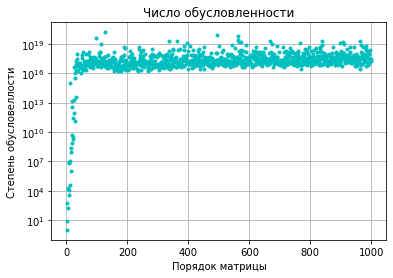

In [11]:
drawGraph(CONDs, '.c', 'Число обусловленности', 'Порядок матрицы', 'Степень обусловеллости')  # Отрисовка графика с заданными параметрами

##### Число обусловленности получилось больше чем 10^3 соотственно матрицы плохо обусловленны
Диапазон чисел обусловленности от 10^5 до 10^21                                                                                                                                                             

#### Построим график работы функции Cond

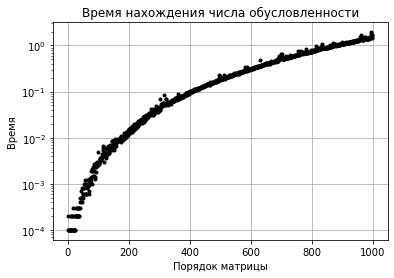

In [12]:
drawGraph(timeCond, '.k', 'Время нахождения числа обусловленности', 'Порядок матрицы', 'Время')  # Отрисовка графика с заданными параметрам                                                                

##### Время работы не значительно изменяется в диапазоне от 0.001 до 1

#### Построим график работы функции Solve

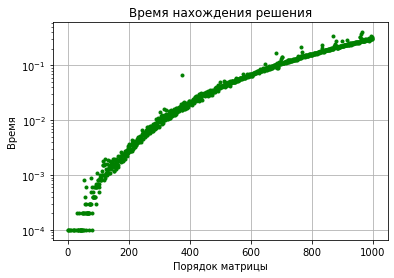

In [13]:
drawGraph(timeSolve, '.g', 'Время нахождения решения', 'Порядок матрицы', 'Время')            # Отрисовка графика с заданными параметрами                                             

##### Время работы не значительно изменяется в диапазоне от 0.0001 до 1

#### Построим график ошибок

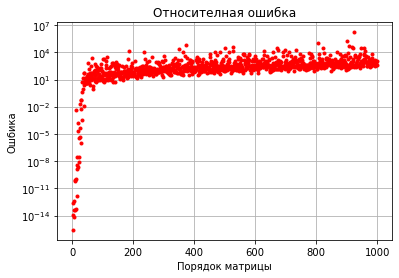

In [14]:
drawGraph(Error, '.r', 'Относителная ошибка', 'Порядок матрицы', 'Ошбика')                    # Отрисовка графика с заданными параметрами                                            

#### Средняя относительная ошибка в диапазоне 10^3 - 10^4 но заметен рост при увеличении порядка матрицы
Так как число обусловленности достаточно велико и стремится к бесконечности с увеличением порядка матрицы, относительная ошибка так же растёт.
Такие матрицы нельзя решать с помощью математических библиотек при помощи машинных вычислений так как действительный результат рассчёта мождет сильно отличаться от правильного!

##### Построим график вязки

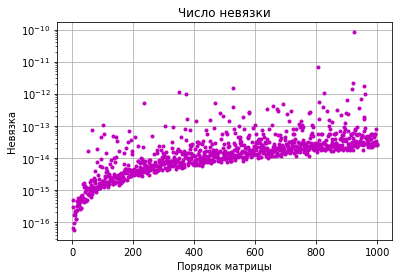

In [15]:
drawGraph(Discrepancy, '.m', 'Число невязки', 'Порядок матрицы', 'Невязка')                    # Отрисовка графика с заданными параметрами

#### Число невязки растёт с увеличением порядка матрицы, максимальное значение на графике порядка 10^-12 
Проанализировав наши эксперементы можно сделать выводы:
1) Время вычислений функции cond не зависит от кол-ва элементов матрицы но растёт с увеличением порядка матрицы

2) Время вычислений функции solve не зависит от кол-ва элементов матрицы но растёт с увеличением порядка матрицы

3) Обусловленность матрицы никак не влияет на время вычисления функции cond

4) Обусловленность матрицы никак не влияет на время вычисления функции solve

5) Время вычислений функции cond зависит от порядка матрицы

6) Время вычислений функции solve зависит от порядка матрицы

7) Относительная ошибка растёт вместе с порядком матрицы

8) Невязка так же растёт вместе с порядком матрицы
